In [1]:
import numpy as np
import argparse
import pandas as pd
import os
import sys 
sys.path.insert(0,"..")
import torch
from torchxrayvision.datasets import CT_Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchxrayvision.autoencoders import ResNetAE50
import torchvision
import torchxrayvision as xrv
import sklearn, sklearn.model_selection

In [2]:
transforms = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])

Setting XRayResizer engine to cv2 could increase performance.


In [3]:
dataset = xrv.datasets.CT_Dataset(
        imgpath = "/dataNAS/people/lblankem/", 
        transform=transforms, data_aug=None, unique_patients=False)

datas = []
datas_names = []
datas.append(dataset)
datas_names.append("ct")

                                                fullname         mrn  \
0      AC421326a-AC421363e_1.2.840.4267.32.1496163441...  25484585.0   
1      AC421326b-AC421363f_1.2.840.4267.32.3396896681...  27506039.0   
13     AC4213272-AC42140c8_1.2.840.4267.32.2218613666...  61174421.0   
18     AC4213275-AC4213649_1.2.840.4267.32.1442505479...  13045877.0   
19     AC4213276-AC421364a_1.2.840.4267.32.1801448574...  26456970.0   
...                                                  ...         ...   
14626  AC4244a08-AC4244ce7_1.2.840.4267.32.3439192758...  21284484.0   
14644  AC4244a7d-AC4244db4_1.2.840.4267.32.2563503217...  20836912.0   
14647  AC4244a86-AC4244dc1_1.2.840.4267.32.1838271074...  23871338.0   
14659  AC4244ae6-AC4244e6e_1.2.840.4267.32.1244100542...  15182348.0   
14665  AC4244b1c-AC4244ec0_1.2.840.4267.32.3636005877...  40939845.0   

       accession   anon_mrn anon_accession  days_jitter  \
0        6971188  AC421326a      AC421363e         -4.0   
1        6827612 

In [4]:
train_datas = []
test_datas = []
for i, dataset in enumerate(datas):

    gss = sklearn.model_selection.GroupShuffleSplit(train_size=0.8,test_size=0.2, random_state=0)
    train_inds, test_inds = next(gss.split(X=range(len(dataset)), groups=dataset.csv.patientid))
    train_dataset = xrv.datasets.SubsetDataset(dataset, train_inds)
    test_dataset = xrv.datasets.SubsetDataset(dataset, test_inds)
    
    #disable data aug
    #test_dataset.data_aug = None #Louis commented this out
    
    train_datas.append(train_dataset)
    test_datas.append(test_dataset)

In [5]:
model = xrv.autoencoders.ResNetAE50()

In [6]:
print(test_dataset)

{'Atelectasis': {0: 446, 1: 153}}
SubsetDataset num_samples=599
└ of CT_Dataset


In [7]:
test_loader = torch.utils.data.DataLoader(test_dataset,
                                               batch_size=1,
                                               shuffle=False,
                                               num_workers=1)

In [8]:
model.load_state_dict(torch.load('../output/ct-ResNetAE50-ct-e999.pt', map_location=torch.device('cpu'))['model_state_dict'])

<All keys matched successfully>

{'idx': tensor([2]), 'lab': tensor([0]), 'img': tensor([[[[-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          ...,
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346]]]])}
884.8286
-1811.6924


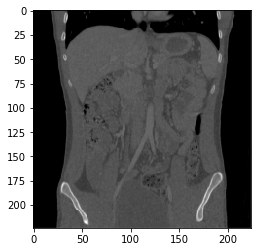

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


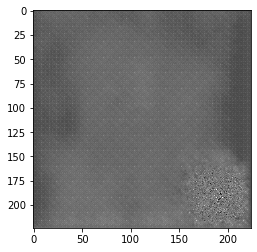

2.8376431
-1.2646304
{'idx': tensor([3]), 'lab': tensor([0]), 'img': tensor([[[[-1563.6346, -1683.0984, -1683.0997,  ...,  -983.4548,
            -986.5576, -1490.9396],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1097.2153,
           -1047.5636, -1510.3387],
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1099.7328,
           -1052.8420, -1410.1969],
          ...,
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1126.7350,
           -1236.9940, -1637.4559],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1080.2000,
           -1137.3152, -1580.3945],
          [-1563.6346, -1683.0984, -1683.0997,  ..., -1015.0616,
            -954.8146, -1372.8101]]]])}
1023.991
-1811.6924


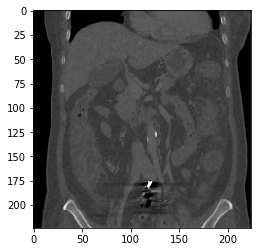

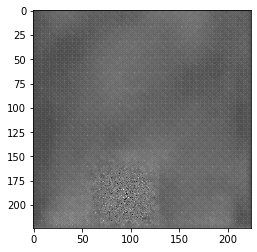

2.830655
-1.2625996
{'idx': tensor([6]), 'lab': tensor([0]), 'img': tensor([[[[-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          ...,
          [-1683.0997, -1811.6909, -1796.4435,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          [-1683.0984, -1811.6892, -1785.3918,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1563.6346, -1683.0975, -1637.5294,  ..., -1683.0997,
           -1683.0984, -1563.6346]]]])}
1012.57806
-1811.6924


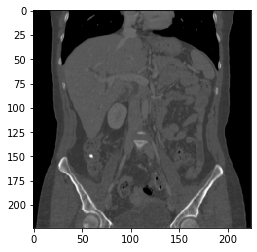

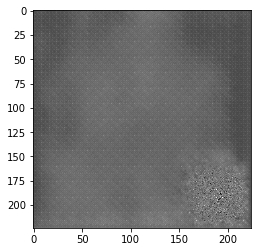

2.840893
-1.2473352
{'idx': tensor([7]), 'lab': tensor([0]), 'img': tensor([[[[-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          ...,
          [-1017.1793, -1130.9316, -1205.0021,  ..., -1191.2053,
           -1076.5278, -1531.8883],
          [ -990.4948, -1138.9208, -1219.1836,  ..., -1216.5875,
           -1075.0504, -1438.9371],
          [ -903.6744, -1066.4807, -1124.1454,  ..., -1137.0936,
           -1019.1217, -1276.1936]]]])}
1004.68
-1811.6924


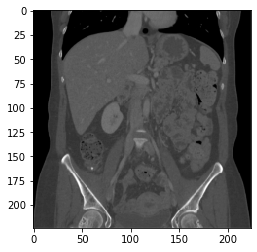

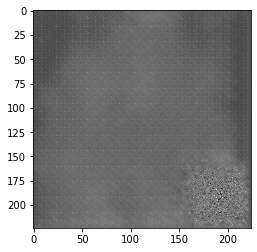

2.8317165
-1.2515198
{'idx': tensor([15]), 'lab': tensor([0]), 'img': tensor([[[[-1511.2488, -1008.0435, -1095.3629,  ..., -1659.4780,
           -1683.0984, -1563.6346],
          [-1633.5460, -1081.9607, -1184.6519,  ..., -1779.2460,
           -1811.6893, -1683.0984],
          [-1638.7271, -1098.1229, -1144.5504,  ..., -1770.3916,
           -1811.6906, -1683.0997],
          ...,
          [ -951.3173, -1023.9991, -1024.0000,  ..., -1024.0000,
           -1023.9991,  -951.3173],
          [ -951.3165, -1023.9983, -1023.9991,  ..., -1023.9991,
           -1023.9983,  -951.3165],
          [ -883.7935,  -951.3165,  -951.3173,  ...,  -951.3173,
            -951.3165,  -883.7935]]]])}
1024.0
-1811.6924


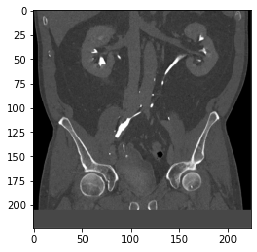

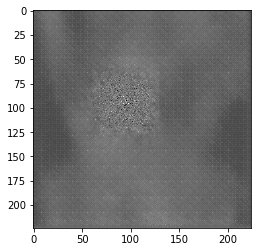

2.9084508
-1.2921722
{'idx': tensor([16]), 'lab': tensor([0]), 'img': tensor([[[[-1563.6342, -1668.9170, -1108.0133,  ..., -1683.0997,
           -1683.0984, -1563.6346],
          [-1683.0983, -1804.6580, -1198.4998,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1683.0996, -1804.7847, -1221.2816,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          ...,
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346]]]])}
974.31256
-1811.6924


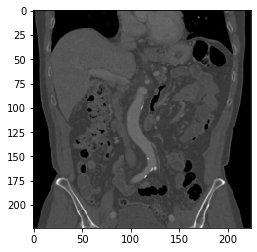

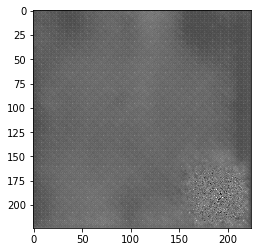

2.8265257
-1.2758448
{'idx': tensor([18]), 'lab': tensor([0]), 'img': tensor([[[[-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          ...,
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          [-1682.8341, -1811.4048, -1811.4064,  ..., -1811.4064,
           -1811.4048, -1682.8341],
          [-1314.5229, -1414.9542, -1414.9554,  ..., -1414.9554,
           -1414.9542, -1314.5229]]]])}
749.3871
-1811.6924


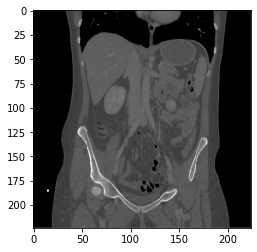

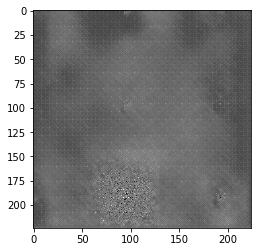

2.7461042
-1.1791023
{'idx': tensor([37]), 'lab': tensor([0]), 'img': tensor([[[[-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          ...,
          [-1683.0997, -1811.6909, -1811.6923,  ..., -1152.7406,
           -1410.8927, -1681.6429],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1164.0663,
           -1428.6624, -1681.7220],
          [-1563.6346, -1683.0984, -1683.0997,  ..., -1076.4823,
           -1335.9250, -1562.3994]]]])}
1023.94
-1811.6924


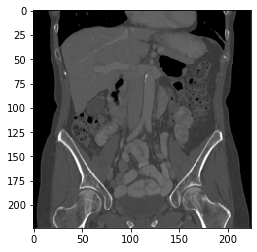

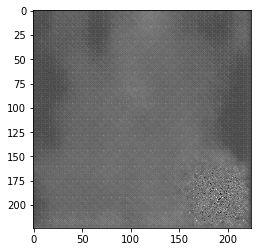

2.7996256
-1.2450595
{'idx': tensor([39]), 'lab': tensor([0]), 'img': tensor([[[[-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          ...,
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0995,
           -1683.0984, -1563.6346]]]])}
970.0766
-1811.6924


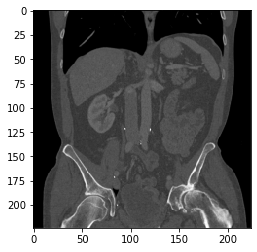

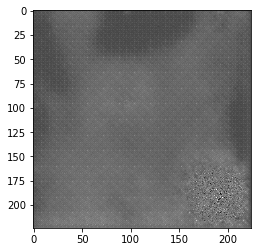

2.8359718
-1.226839
{'idx': tensor([40]), 'lab': tensor([0]), 'img': tensor([[[[-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          ...,
          [-1640.2994, -1225.9700, -1174.5017,  ..., -1169.1984,
           -1191.8293, -1109.1956],
          [-1624.6687, -1159.7261, -1147.5356,  ..., -1216.8593,
           -1242.7556, -1160.8145],
          [-1473.5485, -1056.2656, -1069.1248,  ..., -1128.8741,
           -1138.1687, -1065.7551]]]])}
996.1775
-1811.6924


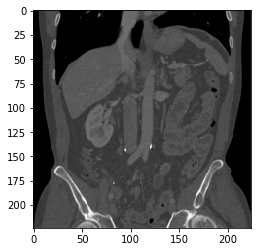

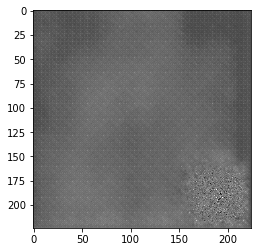

2.8276002
-1.2505254
{'idx': tensor([41]), 'lab': tensor([0]), 'img': tensor([[[[-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          ...,
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346]]]])}
892.33856
-1811.6924


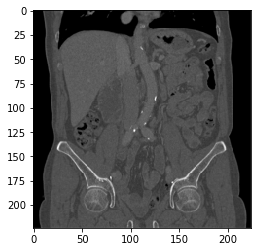

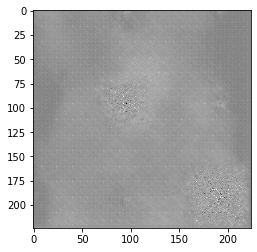

3.1952755
-3.5711737
{'idx': tensor([50]), 'lab': tensor([0]), 'img': tensor([[[[-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          ...,
          [ -951.3173, -1023.9991, -1024.0000,  ..., -1024.0000,
           -1023.9991,  -951.3173],
          [ -951.3165, -1023.9983, -1023.9991,  ..., -1023.9991,
           -1023.9983,  -951.3165],
          [ -883.7935,  -951.3165,  -951.3173,  ...,  -951.3173,
            -951.3165,  -883.7935]]]])}
1024.0
-1811.6924


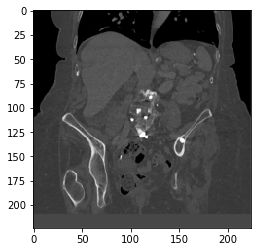

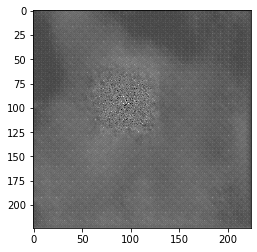

2.8495235
-1.1924169
{'idx': tensor([54]), 'lab': tensor([0]), 'img': tensor([[[[-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          ...,
          [-1293.9683, -1190.7375, -1173.2385,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          [-1288.2461, -1161.4324, -1130.7815,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1206.4948, -1074.2920, -1065.2537,  ..., -1683.0997,
           -1683.0984, -1563.6346]]]])}
867.1178
-1811.6924


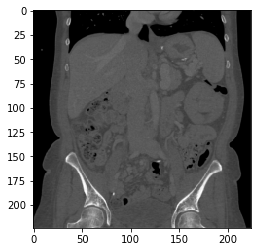

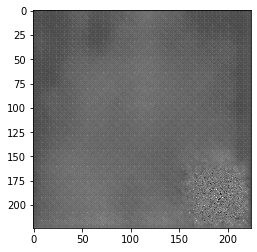

2.837702
-1.2522379
{'idx': tensor([57]), 'lab': tensor([0]), 'img': tensor([[[[-1483.9648, -1072.7346, -1104.4844,  ..., -1107.5903,
           -1107.1888, -1491.3341],
          [-1601.5394, -1177.8207, -1171.0282,  ..., -1143.3967,
           -1178.4167, -1604.7089],
          [-1600.6469, -1177.6371, -1195.8555,  ..., -1124.9517,
           -1174.4943, -1607.2469],
          ...,
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346]]]])}
830.2232
-1811.6924


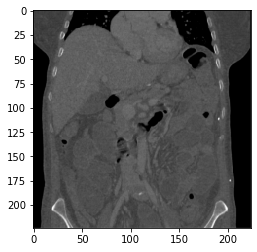

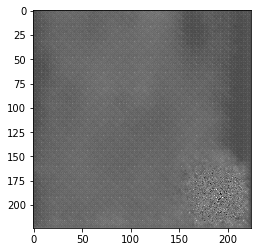

2.8373132
-1.2753589
{'idx': tensor([58]), 'lab': tensor([0]), 'img': tensor([[[[-1561.6548, -1204.4958, -1084.2900,  ..., -1683.0997,
           -1683.0984, -1563.6346],
          [-1681.0573, -1321.2178, -1197.1774,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1681.1060, -1330.4974, -1170.9427,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          ...,
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346]]]])}
779.56934
-1811.6924


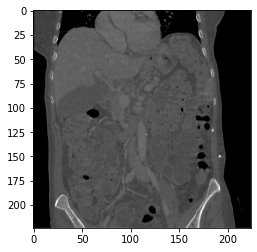

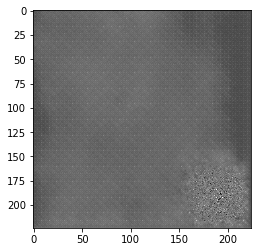

2.8358583
-1.2741706
{'idx': tensor([59]), 'lab': tensor([0]), 'img': tensor([[[[ -999.0557, -1141.5164, -1122.4221,  ..., -1679.3354,
           -1683.0984, -1563.6346],
          [-1015.7456, -1210.6058, -1185.6749,  ..., -1811.0933,
           -1811.6893, -1683.0984],
          [ -942.6491, -1201.4392, -1183.2899,  ..., -1811.3275,
           -1811.6909, -1683.0997],
          ...,
          [ -974.0041, -1177.8047, -1197.9771,  ..., -1200.7853,
           -1189.5664, -1078.2578],
          [-1023.8024, -1180.5540, -1201.4125,  ..., -1188.9448,
           -1220.6985, -1134.9623],
          [ -958.6966, -1075.2812, -1124.7618,  ..., -1113.0105,
           -1120.2700, -1043.2527]]]])}
978.8885
-1811.6924


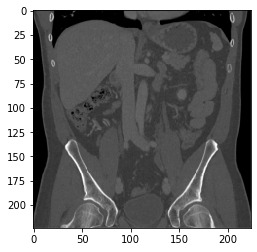

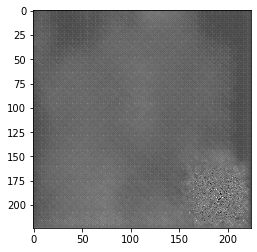

2.8186326
-1.2557515
{'idx': tensor([60]), 'lab': tensor([0]), 'img': tensor([[[[-1563.6346, -1683.0984, -1683.0997,  ..., -1166.3396,
           -1680.9595, -1563.6346],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1336.3890,
           -1810.1042, -1683.0984],
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1483.9269,
           -1811.1577, -1683.0997],
          ...,
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1657.7476,
           -1811.6863, -1683.0997],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1580.3855,
           -1811.5671, -1683.0984],
          [-1563.6346, -1683.0984, -1683.0997,  ..., -1352.1067,
           -1682.2936, -1563.6346]]]])}
1004.1816
-1811.6924


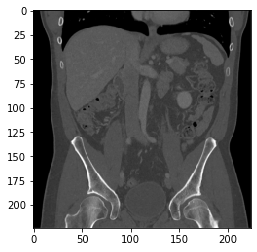

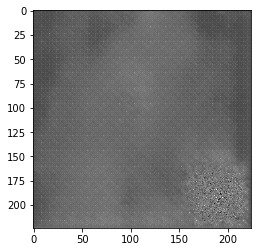

2.8020422
-1.2393961
{'idx': tensor([61]), 'lab': tensor([0]), 'img': tensor([[[[-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          ...,
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346]]]])}
815.4798
-1811.6924


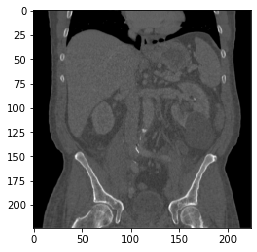

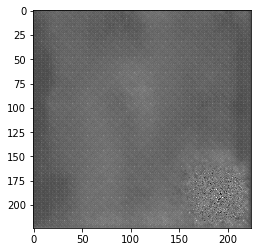

2.7953377
-1.2623188
{'idx': tensor([66]), 'lab': tensor([0]), 'img': tensor([[[[-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          ...,
          [-1124.6409, -1207.1195, -1209.4044,  ..., -1251.6140,
           -1267.6008, -1188.3173],
          [-1150.2048, -1230.0082, -1242.0452,  ..., -1239.3816,
           -1253.1584, -1161.5886],
          [-1072.7424, -1136.8583, -1130.4976,  ..., -1171.8409,
           -1183.2891, -1085.5859]]]])}
1019.02075
-1811.6924


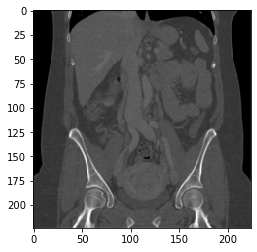

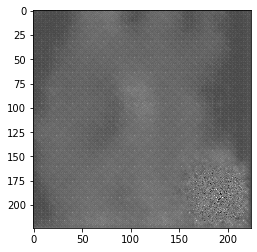

2.8005114
-1.2307696
{'idx': tensor([67]), 'lab': tensor([0]), 'img': tensor([[[[-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          ...,
          [-1683.0997, -1811.6909, -1811.6924,  ..., -1811.6924,
           -1811.6909, -1683.0997],
          [-1683.0984, -1811.6893, -1811.6909,  ..., -1811.6909,
           -1811.6893, -1683.0984],
          [-1563.6346, -1683.0984, -1683.0997,  ..., -1683.0997,
           -1683.0984, -1563.6346]]]])}
977.29926
-1811.6924


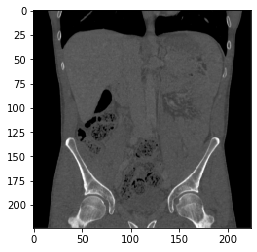

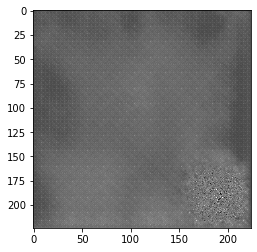

2.8084042
-1.243145


In [9]:
i = 0
for data in test_loader:
    print(data)
    i += 1
    pytorch_img = data['img']
    pytorch_img = pytorch_img.float()
    img = data['img'][0][0].detach().numpy()
    print(np.max(img))
    print(np.min(img))
    plt.imshow(img, cmap = 'gray', interpolation='nearest')
    plt.show()
    ae_out = model(pytorch_img)
    output_img = ae_out['out'][0][0].detach().numpy()
    plt.imshow(output_img, cmap = 'gray', interpolation='nearest')
    plt.show()
    print(np.max(output_img))
    print(np.min(output_img))
    if i == 20:
        break